# Yang - Lee Theory: 

# $H = -\sum_{j}h_x\sigma_j^x - J\sigma_j^z\cdot\sigma_{j+1}^z + i\gamma\sigma_j^z$ 

# <h2> Define the Basis

In [1]:
# Define Pauli matrices
s_x = [0 1; 1 0]
s_z = [1 0; 0 -1]

# Define the identity matrix
id = [1 0; 0 1]

2×2 Matrix{Int64}:
 1  0
 0  1

# <h2> Model Hamiltonian

In [1]:
using LinearAlgebra

function YLHam(hz, hx, J, n_s)
    "This function constructs the YL Hamiltonian for a 1D chain of spins with open boundary conditions (OBC).
    hz : the strength of the transverse field
    hx : the strength of the longitudinal field
    J : the strength of the interaction between spins
    n_s : the number of spins (sites) in the chain"
    # Define Pauli matrices
    s_x = [0 1; 1 0]
    s_z = [1 0; 0 -1]

    # Define the identity matrix
    id = [1 0; 0 1]

    # Initialize the YLHamiltonian matrix
    H = zeros(2^n_s, 2^n_s)

    # Construct the X term of the YLHamiltonian
    for i in 1:n_s
        operator_list = fill(id, n_s)  # fill the list with id matrices
        operator_list[i] = s_x      # replace the i-th id matrix with s_x
        H += -hx*kron(operator_list...) #kron is tensor product function

    end
    
    # # Construct the Z term of the YLHamiltonian
    for i in 1:n_s
        operator_list = fill(id, n_s)
        operator_list[i] = s_z
        H += hz*kron(operator_list...)

    end
    # # Construct the J term of the YLHamiltonian
    for i in 1:n_s-1  # -1 include to impose OBC condition
        operator_list = fill(id, n_s)
        operator_list[i] = s_z
        operator_list[i+1] = s_z
        H += -J*kron(operator_list...)

    end

    return H
end


YLHam (generic function with 1 method)

# <h2> Energy Spectrum

In [3]:
# caluculate the energy spectrum
function energy_spectrum(hz, hx, J, n_s)
    "This function calculates the energy spectrum of the YL Hamiltonian for a 1D chain of spins with OBC."
    H = YLHam(hz, hx, J,n_s)
    a, b = eigen(H) # a is eigenvalues, b is eigenvectors
    return a
end
# imag(energy_spectrum(1im*0.35, 1.3, 1))

energy_spectrum (generic function with 1 method)

# <h3> Plot the real and imaginary part of the energy spectrum

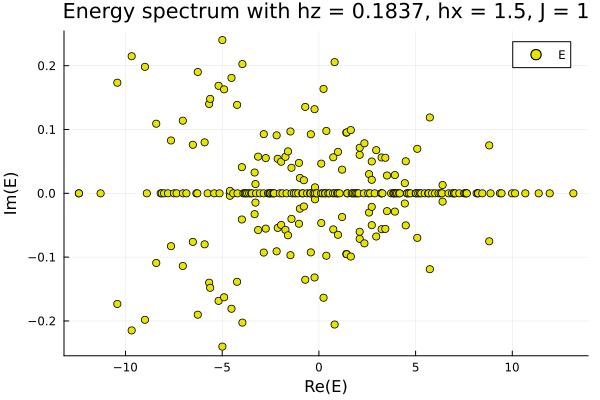

In [4]:
# plot the eigenvalues
using Plots
#define the color
dark_yellow = RGB(0.9,0.9,0.0)
# plot the eigenvalues
plot(energy_spectrum(1im*.1837, 1.5, 1,8), seriestype=:scatter,label = "E",color = dark_yellow, legend = :topright)
# Put x and y title 
xlabel!("Re(E)")
ylabel!("Im(E)")
title!("Energy spectrum with hz = 0.1837, hx = 1.5, J = 1")


# <h3> Plot the imaginary part of the ground state energy spectrum

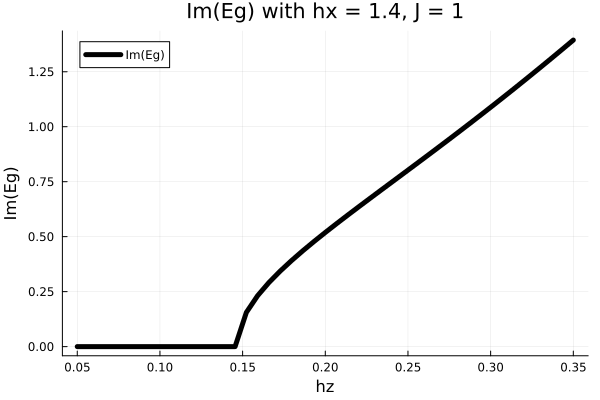

In [10]:
function imaginary_part_of_eigenvalues(hz_values, hx, J, n_s)
    "This function calculates the imaginary part of the eigenvalues of the YL Hamiltonian for a 1D chain of spins with OBC."
    imaginary_parts = []

    for hz in hz_values
        eigenvalues = energy_spectrum(1im* hz, hx, J, n_s)
        push!(imaginary_parts, abs(imag(eigenvalues[1])))  #  the imaginary part of the first eigenvalue
    end

    return imaginary_parts
end

# Example usage:
hz_values = collect(range(0.05, stop= 0.35, length=45))  # Adjust the range and length as needed
hx = 1.4
J = 1
n_s = 8
imaginary_parts = imaginary_part_of_eigenvalues(hz_values, hx, J, n_s)
#imaginary_parts_of_eigenvalues = imaginary_part_of_eigenvalues(hz_values, hx, J)

#plot the imaginary parts of the eigenvalues
plot(hz_values, imaginary_parts,label = "Im(Eg)",color = :black, legend = :topleft,linewidth = 5)
# Put x and y title
xlabel!("hz")
ylabel!("Im(Eg)")
title!("Im(Eg) with hx = 1.4, J = 1")

# <h2> Magnetisation along $x$-axis

# <h3> Extract the ground state

In [6]:
# extract the ground state eigenvector
function ground_state(hz, hx, J, n_s)
    "This function calculates the ground state eigenvector of the YL Hamiltonian for a 1D chain of spins with OBC."
    H = YLHam(hz, hx, J,n_s)
    a, b = eigen(H)
    return b[:,1]
end
#ground_state(1im*.1105, 1.3, 1)

ground_state (generic function with 1 method)

# <h3> Calculate the magnetisation along $x$-axis

In [28]:
function magnetization_x(hz, hx, J, n_si)
    "This function calculates the expectation value of the magnetization in the x direction 
    for the ground state of the YL Hamiltonian for a 1D chain of spins with OBC."
    # Initialize the magnetization matrix
    M = zeros(2^n_si, 2^n_si)  

    # Define s_x and id matrices (2x2 matrices)
    s_x = [0 1; 1 0]
    id = [1 0; 0 1]

    # Loop to construct the magnetization matrix
    for i in 1:n_si
        operator_list = fill(id, n_si) # fill the id matrix in the operator_list
        operator_list[i] = s_x  # replace the id matrix with s_x matrix
        M += kron(operator_list...)

    end

    # Calculate the ground state
    psi = ground_state(hz, hx, J, n_si)
    

    # Calculate expectation value of magnetization
    result = abs(dot((psi), M *psi)/n_si)

    return result
end
magnetization_x(1im*.1105, 1.3, 1,8)

0.7870536261526977

# <h3> Plot the magnetisation along $x$-axis

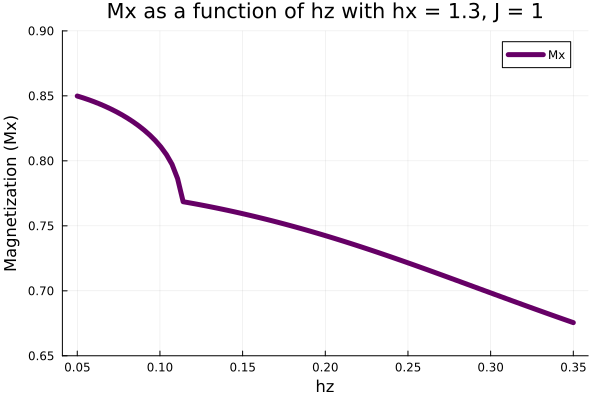

In [9]:
#plot the magnetisation as a function of hz
hz = range(0.05, 0.35, length=90)
# define the color
dark_violet = RGB(0.4, 0.0, 0.4)
# plot the magnetisation
plot(hz, (real.(magnetization_x.(1im*hz, 1.3, 1,8))), label = "Mx", linecolor = dark_violet, legend = :topright, linewidth = 5)
# Put x and y title
xlabel!("hz")
ylabel!("Magnetization (Mx)")
title!("Mx as a function of hz with hx = 1.3, J = 1")
#set the scale of the y-axis
yaxis!((0.65, 0.900))